# Nearest Neighbor #

sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either NumPy arrays or scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.

There are many learning routines which rely on nearest neighbors at their core. One example is kernel density estimation, discussed in the density estimation section.

## Unsupervised Nearest Neighbors ##

NearestNeighbors implements unsupervised nearest neighbors learning. It acts as a uniform interface to three different nearest neighbors algorithms: BallTree, KDTree, and a brute-force algorithm based on routines in sklearn.metrics.pairwise. The choice of neighbors search algorithm is controlled through the keyword 'algorithm', which must be one of ['auto', 'ball_tree', 'kd_tree', 'brute']. When the default value 'auto' is passed, the algorithm attempts to determine the best approach from the training data. For a discussion of the strengths and weaknesses of each option, see Nearest Neighbor Algorithms.

### Finding the Nearest Neighbors ###

For the simple task of finding the nearest neighbors between two sets of data, the unsupervised algorithms within sklearn.neighbors can be used:

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [2]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [3]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

## KDTree and BallTree Classes ##

Alternatively, one can use the KDTree or BallTree classes directly to find nearest neighbors. This is the functionality wrapped by the NearestNeighbors class used above. The Ball Tree and KD Tree have the same interface; we’ll show an example of using the KD Tree here:

In [4]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

Refer to the KDTree and BallTree class documentation for more information on the options available for nearest neighbors searches, including specification of query strategies, distance metrics, etc. For a list of available metrics, see the documentation of the DistanceMetric class

## Nearest Neighbors Classification ##

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where K is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

The -neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value  is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius r, such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights

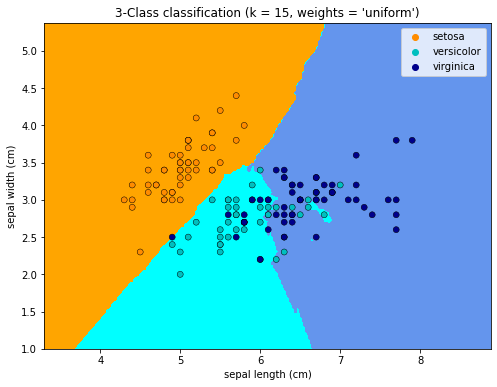

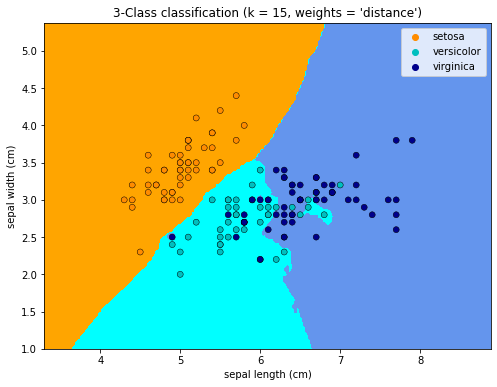

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

## Nearest Neighbors Regression ##

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

scikit-learn implements two different neighbors regressors: KNeighborsRegressor implements learning based on the  nearest neighbors of each query point, where K  is an integer value specified by the user. RadiusNeighborsRegressor implements learning based on the neighbors within a fixed radius r of the query point, where r is a floating-point value specified by the user.

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns equal weights to all points. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.

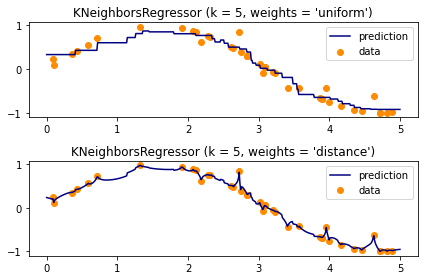

In [7]:
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

## Nearest Centroid Classifier ##

The NearestCentroid classifier is a simple algorithm that represents each class by the centroid of its members. In effect, this makes it similar to the label updating phase of the KMeans algorithm. It also has no parameters to choose, making it a good baseline classifier. It does, however, suffer on non-convex classes, as well as when classes have drastically different variances, as equal variance in all dimensions is assumed. See Linear Discriminant Analysis (LinearDiscriminantAnalysis) and Quadratic Discriminant Analysis (QuadraticDiscriminantAnalysis) for more complex methods that do not make this assumption. Usage of the default NearestCentroid is simple:

In [8]:
from sklearn.neighbors import NearestCentroid
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = NearestCentroid()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]


## Nearest Shrunken Centroid ##

The NearestCentroid classifier has a shrink_threshold parameter, which implements the nearest shrunken centroid classifier. In effect, the value of each feature for each centroid is divided by the within-class variance of that feature. The feature values are then reduced by shrink_threshold. Most notably, if a particular feature value crosses zero, it is set to zero. In effect, this removes the feature from affecting the classification. This is useful, for example, for removing noisy features.

In the example below, using a small shrink threshold increases the accuracy of the model from 0.81 to 0.82.

None 0.8133333333333334
0.2 0.82


/var/folders/pw/423gbs8x6pgcnpjz__9p39640000gq/T/ipykernel_39888/362485075.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
/var/folders/pw/423gbs8x6pgcnpjz__9p39640000gq/T/ipykernel_39888/362485075.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


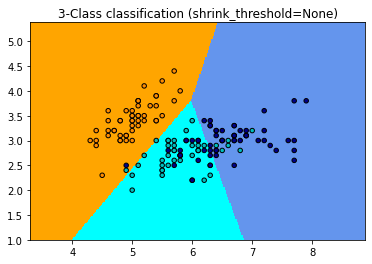

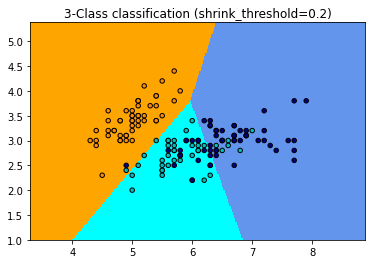

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None, 0.2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print(shrinkage, np.mean(y == y_pred))
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()

## Nearest Neighbors Transformer ##

Many scikit-learn estimators rely on nearest neighbors: Several classifiers and regressors such as KNeighborsClassifier and KNeighborsRegressor, but also some clustering methods such as DBSCAN and SpectralClustering, and some manifold embeddings such as TSNE and Isomap.

All these estimators can compute internally the nearest neighbors, but most of them also accept precomputed nearest neighbors sparse graph, as given by kneighbors_graph and radius_neighbors_graph. With mode mode='connectivity', these functions return a binary adjacency sparse graph as required, for instance, in SpectralClustering. Whereas with mode='distance', they return a distance sparse graph as required, for instance, in DBSCAN. To include these functions in a scikit-learn pipeline, one can also use the corresponding classes KNeighborsTransformer and RadiusNeighborsTransformer. The benefits of this sparse graph API are multiple.

First, the precomputed graph can be re-used multiple times, for instance while varying a parameter of the estimator. This can be done manually by the user, or using the caching properties of the scikit-learn pipeline

In [10]:
import tempfile
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
cache_path = tempfile.gettempdir()  # we use a temporary folder here
X, _ = make_regression(n_samples=50, n_features=25, random_state=0)
estimator = make_pipeline(
    KNeighborsTransformer(mode='distance'),
    Isomap(n_components=3, metric='precomputed'),
    memory=cache_path)
X_embedded = estimator.fit_transform(X)
X_embedded.shape

(50, 3)

### Note ###
When a specific number of neighbors is queried (using KNeighborsTransformer), the definition of n_neighbors is ambiguous since it can either include each training point as its own neighbor, or exclude them. Neither choice is perfect, since including them leads to a different number of non-self neighbors during training and testing, while excluding them leads to a difference between fit(X).transform(X) and fit_transform(X), which is against scikit-learn API. In KNeighborsTransformer we use the definition which includes each training point as its own neighbor in the count of n_neighbors. However, for compatibility reasons with other estimators which use the other definition, one extra neighbor will be computed when mode == 'distance'. To maximise compatibility with all estimators, a safe choice is to always include one extra neighbor in a custom nearest neighbors estimator, since unnecessary neighbors will be filtered by following estimators

## Neighborhood Components Analysis ##

Neighborhood Components Analysis (NCA, NeighborhoodComponentsAnalysis) is a distance metric learning algorithm which aims to improve the accuracy of nearest neighbors classification compared to the standard Euclidean distance. The algorithm directly maximizes a stochastic variant of the leave-one-out k-nearest neighbors (KNN) score on the training set. It can also learn a low-dimensional linear projection of data that can be used for data visualization and fast classification.

### Classification ###

Combined with a nearest neighbors classifier (KNeighborsClassifier), NCA is attractive for classification because it can naturally handle multi-class problems without any increase in the model size, and does not introduce additional parameters that require fine-tuning by the user.

NCA classification has been shown to work well in practice for data sets of varying size and difficulty. In contrast to related methods such as Linear Discriminant Analysis, NCA does not make any assumptions about the class distributions. The nearest neighbor classification can naturally produce highly irregular decision boundaries.

To use this model for classification, one needs to combine a NeighborhoodComponentsAnalysis instance that learns the optimal transformation with a KNeighborsClassifier instance that performs the classification in the projected space. Here is an example using the two classes:

In [11]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

print(nca_pipe.score(X_test, y_test))

0.9619047619047619


#### Comparing Nearest Neighbors with and without Neighborhood Components Analysis ####

/var/folders/pw/423gbs8x6pgcnpjz__9p39640000gq/T/ipykernel_39888/3593156729.py:64: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)
/var/folders/pw/423gbs8x6pgcnpjz__9p39640000gq/T/ipykernel_39888/3593156729.py:64: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)


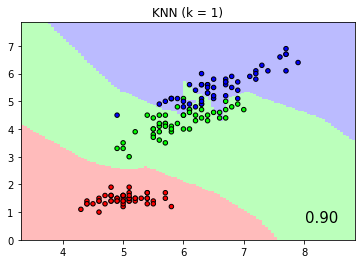

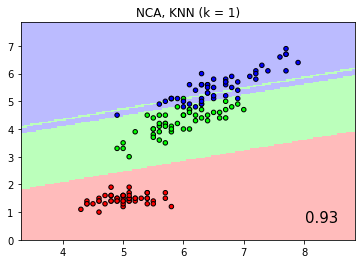

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline


n_neighbors = 1

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()

### Dimensionality reduction ###

NCA can be used to perform supervised dimensionality reduction. The input data are projected onto a linear subspace consisting of the directions which minimize the NCA objective. The desired dimensionality can be set using the parameter n_components. For instance, the following figure shows a comparison of dimensionality reduction with Principal Component Analysis (PCA), Linear Discriminant Analysis (LinearDiscriminantAnalysis) and Neighborhood Component Analysis (NeighborhoodComponentsAnalysis) on the Digits dataset, a dataset with size Nsample = 1797
 and Nfeatures = 67
. The data set is split into a training and a test set of equal size, then standardized. For evaluation the 3-nearest neighbor classification accuracy is computed on the 2-dimensional projected points found by each method. Each data sample belongs to one of 10 classes.

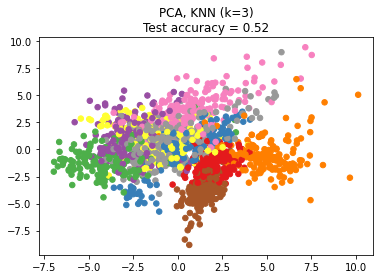

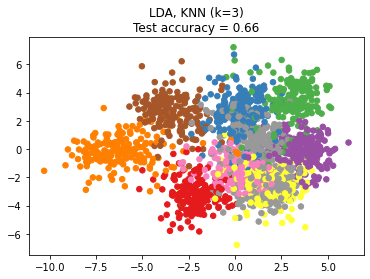

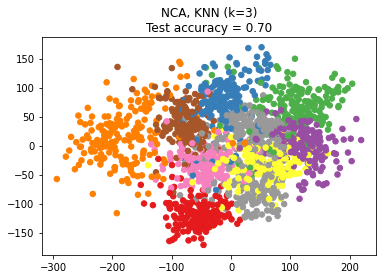

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()